# Assignment: Unsupervised Machine Learning \ Clustering

## Part 1: Partitional Clustering

In this assignment you will experience with partitional & mixture model clustering. The analyses are made on real datasets under the circumstances of real life challenges in unsupervised machine learning.

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import math
%matplotlib inline

### Read blood test results as an EMR from an Excel file

In [2]:
# Open the file
xlsx = pd.ExcelFile('EMR-Blood.xlsx')

# Get the first sheet as an object
sheet1 = xlsx.parse(0)

# Set the Key column as the index
sheet1.set_index("Key", inplace=True)

# Show first 10 rows
sheet1[:10]

,Na,K,ALT,AST,WBC,RBC,Hgb,Hct
Key,,,,,,,,
1,141,4.65,31.92,35.01,10.25,4.06,17.6,36.3
2,140,4.96,36.41,16.70,6.13,3.80,13.2,35.6
3,136,3.66,41.43,13.17,5.86,4.26,16.2,43.7
4,136,4.74,23.92,30.33,10.80,4.83,16.1,49.8
5,140,4.74,43.66,20.44,6.59,4.05,12.6,39.1
6,146,3.98,48.41,33.22,4.53,4.04,17.9,47.3
7,144,5.29,44.29,19.28,10.12,3.96,17.2,47.9
8,138,4.57,50.43,16.39,4.66,4.91,13.7,41.5
9,144,3.96,31.51,34.87,4.57,4.72,15.1,47.6


### Blood Test Abbreviations
- Na == Sodium
- K == Potassium
- ALT == Alanine transaminase
- AST == Aspartate transaminase
- WBC == White blood cells
- RBC == Red blood cells
- Hgb == Hemoglobin
- Hct == Hematocrit

### Use K-Means to create clusters according to variables of uniform distribution

In [3]:
# Retrieve the K, WBC and Hgb column values from the dataset to cluster
variables1 = ["K","WBC","Hgb"]
EMR3d1 = sheet1.loc[:, variables1].values

# Run the K-Means algorithm, assuming the correct number of clusters is 5
y_pred_KMeans1 = KMeans(5).fit(EMR3d1).labels_


### Make a 3D chart

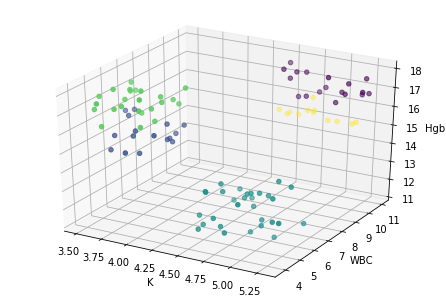

In [4]:
def make_chart (chart_data, y_pred, labels):
    fig = plt.figure()
    #ax = fig.add_subplot(111,projection='3d')
    ax = Axes3D(fig)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.scatter(chart_data[:,0], chart_data[:,1], chart_data[:,2], c=y_pred)

make_chart(EMR3d1, y_pred_KMeans1, variables1)

## Challenge 211

Humans can clearly spot 3 clusters, however, for machines it's much harder to "learn" that. In the above implementation, K-Means was given the value of 5 as K.
Your mission, should you choose to accept it, is to develop a **generic** mechanism for finding the most reasonable number of clusters by:
1. Iterating K over a reasonable range, which should be derived from the number of points
2. Harnessing one of the segmentation algorithms we learned as a heuristic to choose K
3. Showing the final clusters in a 3D chart

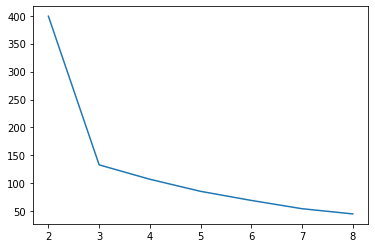

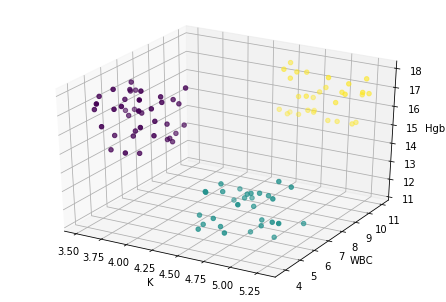

In [6]:
# Add your code for Challenge 211 after this line, and keep it in this cell.
labels = {}


def find_elbow(rot):
    dist = np.array(rot)
    shift = np.Inf
    n = len(rot)
    elbow = 0
    mean_shift = -1*np.diff(dist).mean()
    #Can't caluculate shift for the first and last values
    for i in range(1,dist.size-1):
        #To remove the values where there is still a tremendous shift
        if (dist[i]-dist[i+1]) > mean_shift:
            continue
        t_shift = dist[i-1]+dist[i+1]
        t_shift /= dist[i-1]
        if t_shift < shift:
            shift = t_shift
            elbow = np.where(dist == dist[i])[0]
    return (elbow.item()+2) # Because the indices run from 0
             
def optimize_k(data):
    # I didnt find anywhere where they gave specific criteria for the size of k.
    # A heuristic to try is from 2 -  2**log_10(dataset.size) - for 10x increase in data, we double our possible labels.
    max_k = 2**(math.floor(np.log10(data.size))+1)
    distortion = list()
    for i in range(2,max_k+1):
        #Segmentation algorithm
        kmeanModel = KMeans(i, random_state=42).fit(data)
        distortion.append(kmeanModel.inertia_)
        labels[i] = kmeanModel.labels_
    plt.plot(range(2,max_k+1),distortion)
    #Find perfect elbow
    elbow = find_elbow(distortion)
    return elbow
    
best_k = optimize_k(EMR3d1)
y_pred = KMeans(best_k).fit(EMR3d1).labels_
#graph findings
make_chart(EMR3d1, y_pred, variables1)


### Silhouette analysis

Use graphic visualization of the Silhouette score to support your above answer:

For n_clusters = 2 The average silhouette_score is : 0.5738344190137955
For n_clusters = 3 The average silhouette_score is : 0.644343998493909
For n_clusters = 4 The average silhouette_score is : 0.5277820110145767
For n_clusters = 5 The average silhouette_score is : 0.47175458354454214
For n_clusters = 6 The average silhouette_score is : 0.4248018621448766
For n_clusters = 7 The average silhouette_score is : 0.42880676477890595
For n_clusters = 8 The average silhouette_score is : 0.4494564870907932


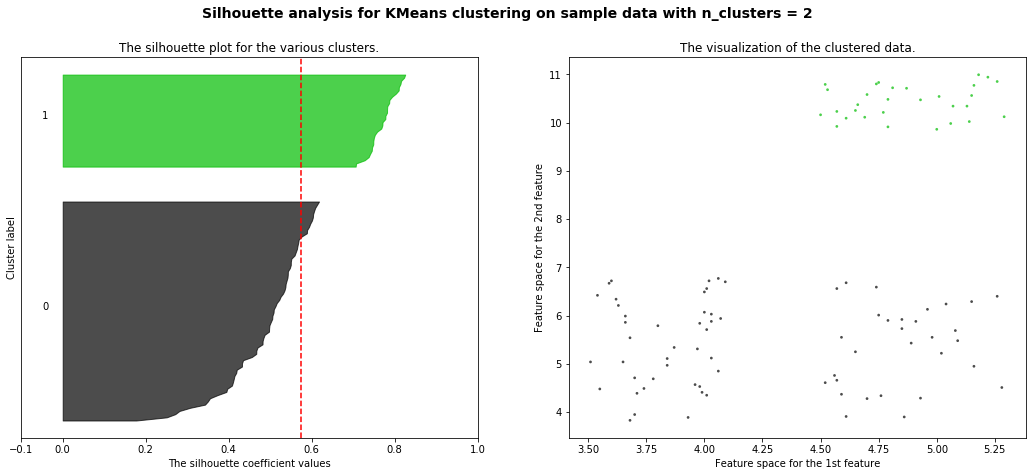

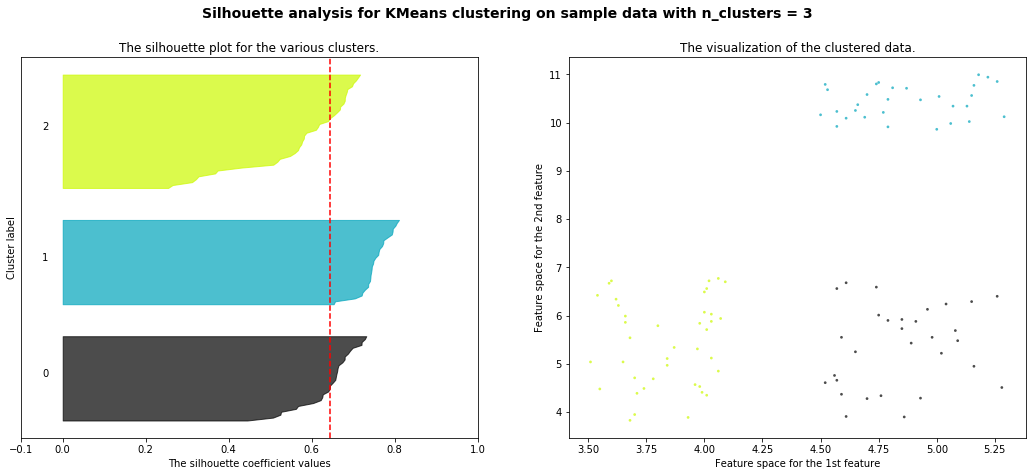

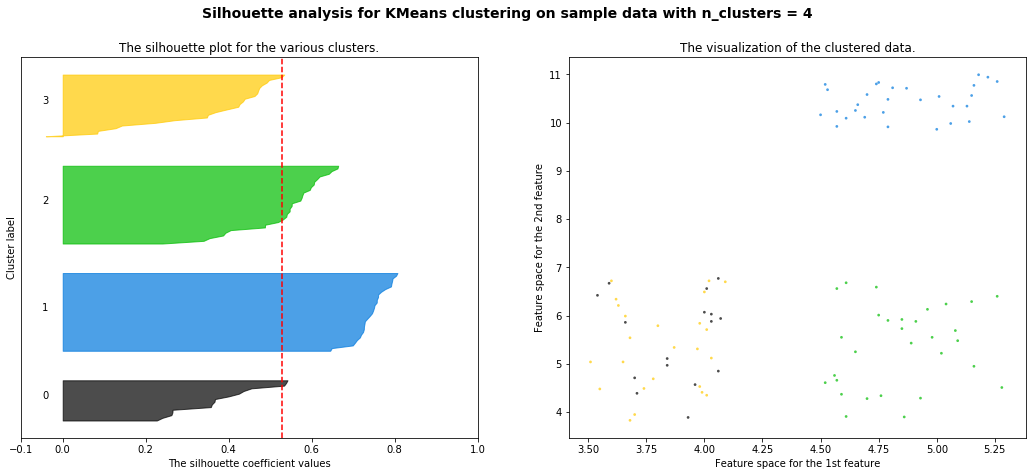

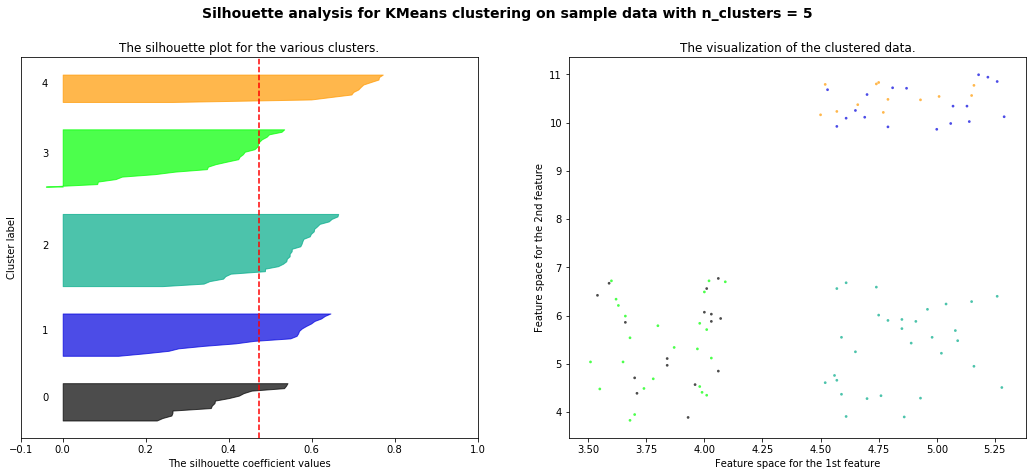

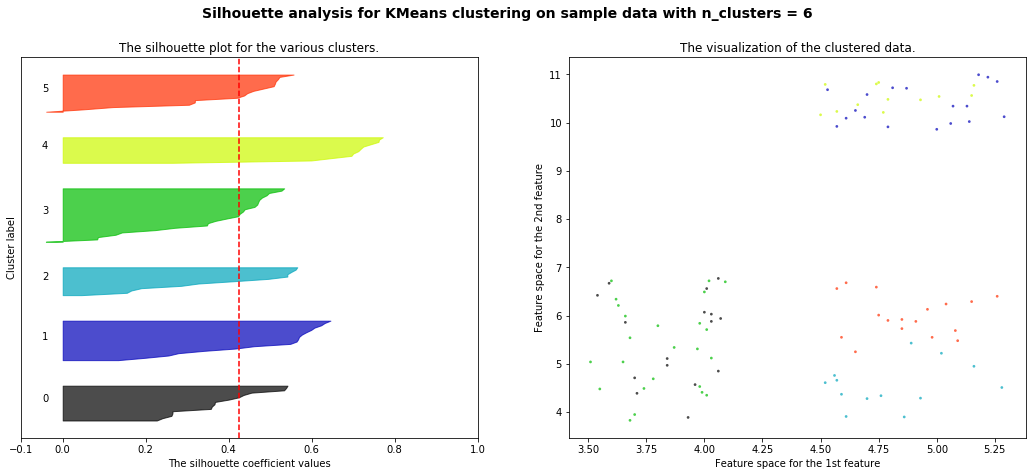

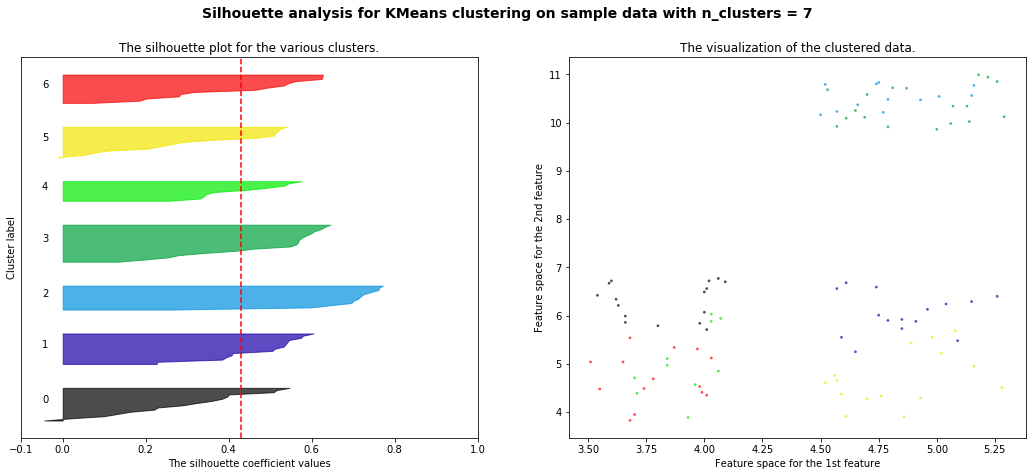

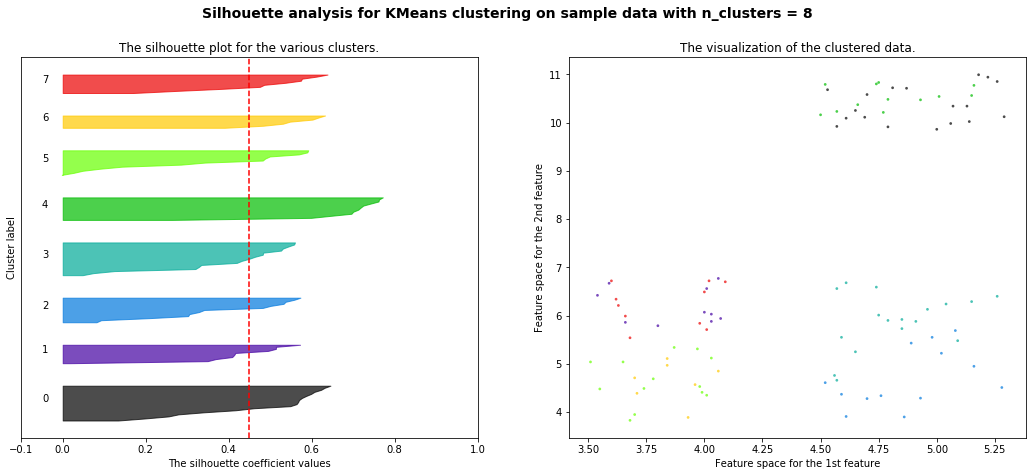

In [7]:
# Add your code for the Sillhouette graphic analysis
# You can use scikit-learn Sillhouette page as a reference

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

def plot_Silhouette(X, y, num_clusters):
    # YOUR CODE HERE

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, y)
    print("For n_clusters =", num_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, y)

    y_lower = 10
    for i in range(num_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[y == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / num_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(y.astype(float) / num_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
#     centers = clusterer.cluster_centers_
#     # Draw white circles at cluster centers
#     ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
#                 c="white", alpha=1, s=200, edgecolor='k')

#     for i, c in enumerate(centers):
#         ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
#                     s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % num_clusters),
                 fontsize=14, fontweight='bold')

    plt.show;
    
for k, label in labels.items():
    plot_Silhouette(EMR3d1, label, k)

## Part 2: Mixture Models Clustering

### Use K-Means to create clusters according to variables of both uniform and Gaussian distributions

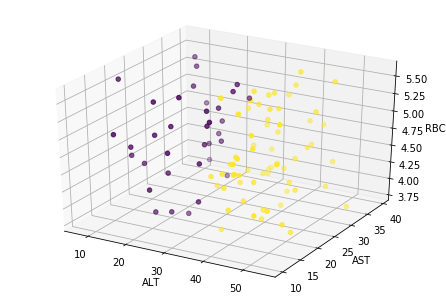

In [8]:
# Retrieve the ALT, AST and RBC column values from the dataset to cluster
variables2 = ["ALT","AST","RBC"]
EMR3d2 = sheet1.loc[:, variables2].values

# Run the K-Means algorithm, assuming the correct number of clusters is 2
y_pred_KMeans2 = KMeans(n_clusters=2, random_state=42).fit_predict(EMR3d2)

# Make a 3D chart
make_chart(EMR3d2, y_pred_KMeans2, variables2)

## Challenge 212
Scientists have found that in this population of patients, RBC distribution is uniform, ALT distribution is a Gaussian and AST distribution is a mixture of two Gaussians. Clearly, even by giving K-Means the correct K, the algorithm got to the wrong conclusion. This separation is "technically" correct, but lacks some underlying understanding of the natural phenomena. Your mission, should you choose to accept it, is to:
1. Apply the GMM algorithm on this data
2. Make any required (but reasonable) adjustments in order to find the true clusters
3. Show the final clusters in a 3D chart

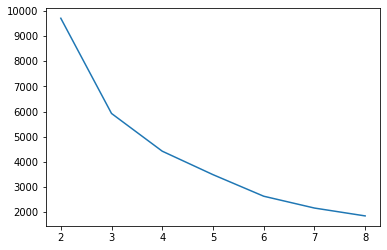

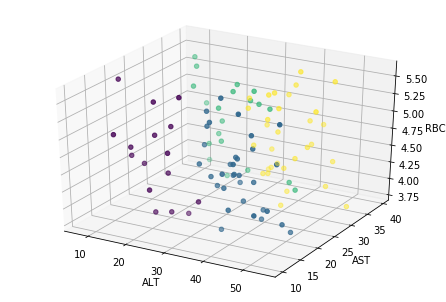

In [10]:
# Add your code for Challenge 212 after this line, and keep it in this cell.
from sklearn.mixture import GaussianMixture as GM

#In a normal situation, where I don't know the number of clusters, I would guess it via optimize_k,
#but here I know that there are four Gaussian distributions...
# best_k = optimize_k(EMR3d2)
best_k = 4

#With the right k, instead of randomly picking our mu's, we will use Kmeans to give us a good intuition to begin
init_clusters = KMeans(best_k).fit(EMR3d2)
init_mean = init_clusters.cluster_centers_
init_weights = np.bincount(init_clusters.labels_)/len(init_clusters.labels_)

#Apply the GM Model
gm = GM(n_components=best_k,random_state=42,covariance_type="full",means_init=init_mean,weights_init=init_weights)
make_chart(EMR3d2, gm.fit_predict(EMR3d2), variables2)




# Good Luck and Enjoy Learning Machine Learning!

